# Machine learning tutorial: Reading handwritten digits with tensorflow

This tutorial will create a machine learning model in TensorFlow that can classify handwritten numerical digits. This will be based on the MNIST dataset, which contains images of handwritten digits (0-9). Python with the TensorFlow and Keras packages must be installed. The MNIST dataset comes bundled with tensorflow. After the model is created, the performance will be tested using images of a few digits that I wrote.

## Load required packages

In [15]:
import math
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import cv2
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from scipy import ndimage

## Load the training and test data

In [3]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Verify the structure of the image data
print("Shape of each image:", train_images.shape[1:])
print("Data type of each image:", train_images.dtype)

# Verify the number of images loaded as training and test data
print("Number of images in training set:", train_images.shape[0])
print("Number of images in testing set:", test_images.shape[0])

Shape of each image: (28, 28)
Data type of each image: uint8
Number of images in training set: 60000
Number of images in testing set: 10000


## Visualize a sample of the training data

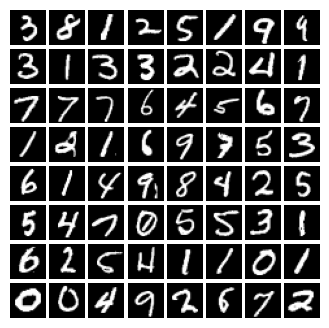

In [4]:
#Plot a random subset of 64 training images

# Set the dimensions of the grid
grid_rows, grid_cols = 8, 8
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(4, 4))

# Flatten the array of axes
axes = axes.ravel()

# Randomly select 64 indices
random_indices = np.random.choice(train_images.shape[0], grid_rows * grid_cols, replace=False)

for i in range(grid_rows * grid_cols):
    # Select the ith random index
    index = random_indices[i]
    
    # Display the corresponding image
    axes[i].imshow(train_images[index], cmap='gray')
    
    # Remove axis ticks
    axes[i].axis('off')

# Display the plot
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

## Prepare the training data

In [5]:
#Standardize the images and encode the labels

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Specify the model architecture

In [6]:
# Create a simple sequential neural network model for digit classification

model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    Dense(125, activation='relu'),  # First hidden layer with 125 nodes and ReLU activation
    Dense(50, activation='relu'),   # Second hidden layer with 50 nodes and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 nodes (for digits 0-9) and softmax activation
])

# Print the model summary to check the architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 125)               98125     
                                                                 
 dense_1 (Dense)             (None, 50)                6300      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 104935 (409.90 KB)
Trainable params: 104935 (409.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the model

In [7]:
# Compile the model with the chosen optimizer, loss function, and metrics

model.compile(
    optimizer='adam',  # Adam optimizer: A method for stochastic optimization
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metric to evaluate model performance during training and testing
)

## Train the model

In [8]:
# Train the neural network model

model.fit(
    train_images, train_labels,   # Training data: images and their corresponding labels
    epochs=5,                     # Number of iterations over the entire dataset
    batch_size=32,                # Number of samples per gradient update
    verbose=1)                    # Verbosity mode (1 = progress bar)

Epoch 1/5


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2472 - accuracy: 0.9269
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1050 - accuracy: 0.9681
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0736 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0531 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0438 - accuracy: 0.9857


## Test the model

In [9]:
# Evaluate the model on the test dataset to determine its accuracy and loss
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2%}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0903 - accuracy: 0.9732
Test Loss: 0.0903, Test Accuracy: 97.32%


In [10]:
# Generate model predictions for the test dataset
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


## Visualize model performance

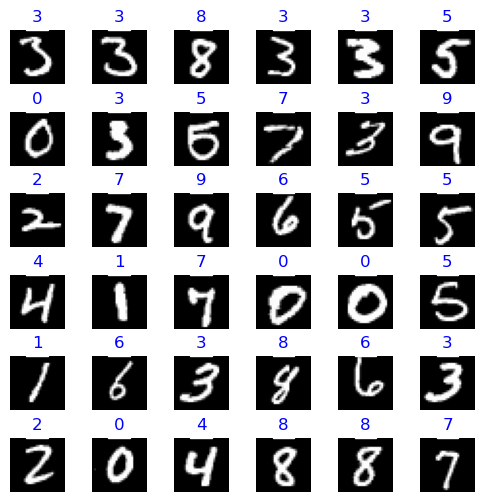

In [13]:
# Set the dimensions of the grid
grid_rows, grid_cols = 6, 6
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(6, 6))
axes = axes.ravel()  # Flatten the array of axes

# Randomly select 36 indices (6x6 grid)
random_indices = np.random.choice(test_images.shape[0], grid_rows * grid_cols, replace=False)

for i in range(grid_rows * grid_cols):
    index = random_indices[i]  # Select the ith random index
    axes[i].imshow(test_images[index], cmap='gray')  # Display the corresponding image
    axes[i].axis('off')  # Remove axis ticks

    predicted_label = np.argmax(predictions[index])  # Get the prediction for the current image
    axes[i].set_title(predicted_label, color='Blue', backgroundcolor='White', fontsize=12)  # Add prediction as title

plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust spacing
plt.show()

## Testing the model on real world data

In [16]:
# Based on code someone else developed to match MNIST image pre-processing
# https://medium.com/@o.kroeger/tensorflow-mnist-and-your-own-handwritten-digits-4d1cd32bbab4
# https://github.com/opensourcesblog/tensorflow-mnist/blob/master/mnist.py 

def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty


def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

# create an an array where we can store our 4 pictures
images = np.zeros((4,784))
# and the correct values
correct_vals = np.zeros((4,10))

# we want to test our images which you saw at the top of this page
i = 0
for no in [0,3,8,9]:
#for no in input_images:

    # read the image
    gray = cv2.imread("images/"+str(no)+".jpg", 0)
    # gray = cv2.imread(no, 0)

    # rescale it
    gray = cv2.resize(255-gray, (28, 28))

    # better black and white version
    (thresh, gray) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    while np.sum(gray[0]) == 0:
        gray = gray[1:]

    while np.sum(gray[:,0]) == 0:
        gray = np.delete(gray,0,1)

    while np.sum(gray[-1]) == 0:
        gray = gray[:-1]

    while np.sum(gray[:,-1]) == 0:
        gray = np.delete(gray,-1,1)

    rows,cols = gray.shape

    if rows > cols:
        factor = 20.0/rows
        rows = 20
        cols = int(round(cols*factor))
        # first cols than rows
        gray = cv2.resize(gray, (cols,rows))
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        # first cols than rows
        gray = cv2.resize(gray, (cols, rows))

    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')

    shiftx,shifty = getBestShift(gray)
    shifted = shift(gray,shiftx,shifty)
    gray = shifted

    # save the processed images
    cv2.imwrite("images_prepared/image_"+str(no)+".jpg", gray)
    """
    all images in the training set have an range from 0-1
    and not from 0-255 so we divide our flatten images
    (a one dimensional vector with our 784 pixels)
    to use the same 0-1 based range
    """
    flatten = gray.flatten() / 255.0
    images[i] = flatten

    correct_val = np.zeros((10))
    try:
        correct_val[no] = 1
    except IndexError:
        raise ValueError(f"Digit {no} is out of range. Must be between 0 and 9.")
    correct_vals[i] = correct_val

    i += 1

C:\Users\ericd\AppData\Local\Temp\ipykernel_18088\239683783.py:6: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  cy,cx = ndimage.measurements.center_of_mass(img)


1/1 [==============================] - 0s 122ms/step


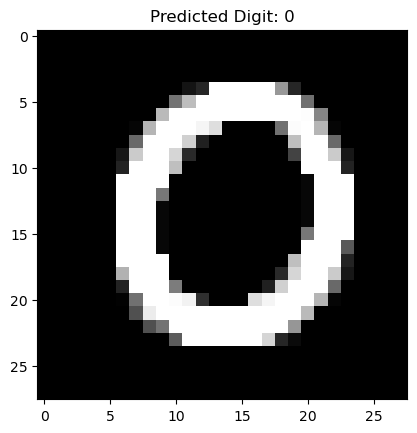

1/1 [==============================] - 0s 35ms/step


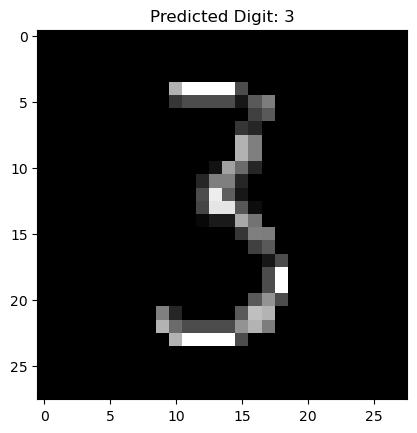

1/1 [==============================] - 0s 35ms/step


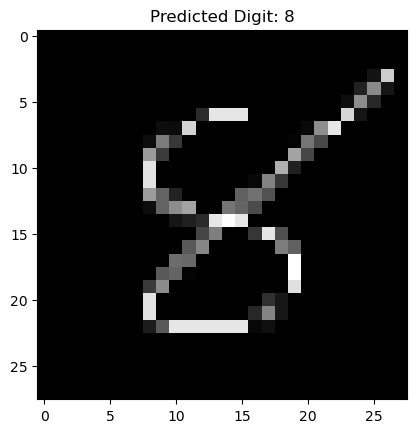

1/1 [==============================] - 0s 37ms/step


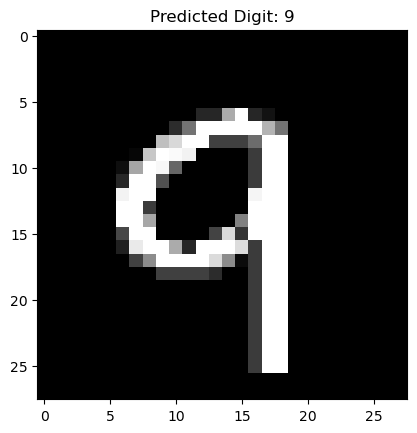

In [17]:
for i in range(images.shape[0]):

    # Reshape the image to match the input shape of the model
    reshaped_image = images[i].reshape(1, 28, 28, 1)  # Adjust the shape based on your model's input

    # Make a prediction
    prediction = model.predict(reshaped_image)
    predicted_digit = np.argmax(prediction)

    # Normalize the image for displaying
    normalized_image = images[i].reshape(28, 28)

    # Plot the processed image and the prediction
    plt.imshow(normalized_image, cmap='gray')
    plt.title(f'Predicted Digit: {predicted_digit}')
    plt.show()